В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів `Keras`, яка буде класифікувати товари із датасету `fasion_mnist`.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету `fasion_mnist`. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))


model.add(Dense(units=10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                        

In [7]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
%%time
history = model.fit(x_train, y_train, batch_size=32, epochs=12, validation_split=0.2)

Epoch 1/12
1500/1500 [==============================] - 12s 4ms/step - loss: 0.4889 - accuracy: 0.8190 - val_loss: 0.3768 - val_accuracy: 0.8542
Epoch 2/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3110 - accuracy: 0.8859 - val_loss: 0.2638 - val_accuracy: 0.9031
Epoch 3/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2594 - accuracy: 0.9035 - val_loss: 0.2646 - val_accuracy: 0.9004
Epoch 4/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2329 - accuracy: 0.9132 - val_loss: 0.2503 - val_accuracy: 0.9097
Epoch 5/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2115 - accuracy: 0.9209 - val_loss: 0.2604 - val_accuracy: 0.9061
Epoch 6/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1896 - accuracy: 0.9295 - val_loss: 0.2347 - val_accuracy: 0.9169
Epoch 7/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1722 - accuracy: 0.9346 - val_loss: 0.2432 - val_accuracy

In [9]:
accuracy_test = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2884 - accuracy: 0.9150


точність моделі на **тренувальних** даних = 95.73 %

точність моделі на **валідаційних** даних = 91.59 %

точність моделі на **тестових даних** = 91.5 %

у порівнянні з простою нейронною мережею, згорткова має більшу точність та швидше вчиться

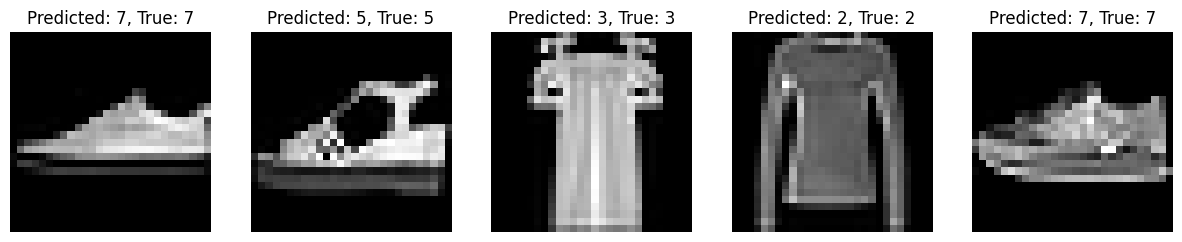

In [10]:
random_indices = np.random.choice(len(x_test), 5, replace=False)

images = x_test[random_indices]
labels = y_test[random_indices]

predictions = model(images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Predicted: {predicted_labels[i]}, True: {labels[i]}')
    ax.axis('off')